In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df=pd.read_csv("day.csv", index_col=1, parse_dates=True)

In [10]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# df_day=df_day.drop(columns=['instant','yr','casual','registered'],axis=1)

In [14]:
a=df.resample('D')

In [16]:
dfs=a.asfreq()

In [17]:
dY=dfs.iloc[:,-3:]
dX=dfs.iloc[:,1:-3]

<AxesSubplot: xlabel='dteday'>

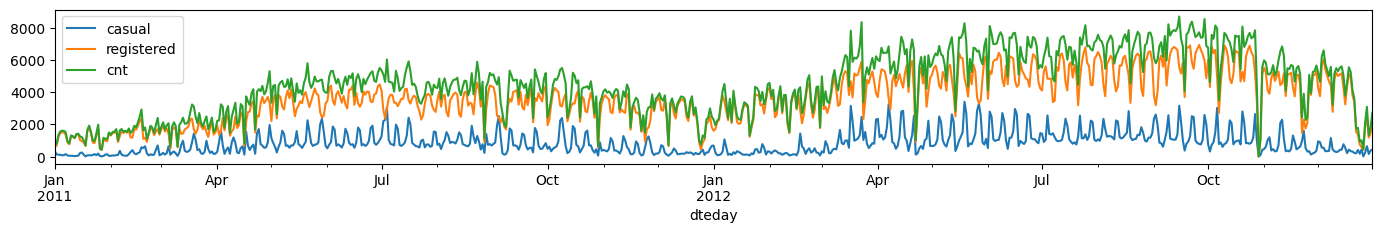

In [18]:
dY.plot(figsize=(17,2))

In [20]:
last_train_index=int(len(dY)*0.75)

In [21]:
y_train=dY.iloc[:last_train_index, -1]
y_test=dY.iloc[last_train_index:,-1]

In [22]:
X_train=dX.iloc[:last_train_index]
X_test=dX.iloc[last_train_index:]

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [41]:
def make_model(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)

    y_predict= model.predict(X_test)
    print("MSE: ", mean_squared_error(y_test, y_predict, squared=True))
    return y_predict

In [42]:
def grid_search(parameters, model, cv, X, y):
    parameters = parameters
    model = model
    clf = GridSearchCV(model, parameters, cv=cv)
    clf.fit(X, y)
    print(clf.best_params_)

In [43]:
print("Ridge Model")
y_predict=make_model(Ridge(alpha= 1, solver= 'auto'), X_train, y_train, X_test, y_test)

Ridge Model
MSE:  1299472.410912754


<AxesSubplot: xlabel='dteday'>

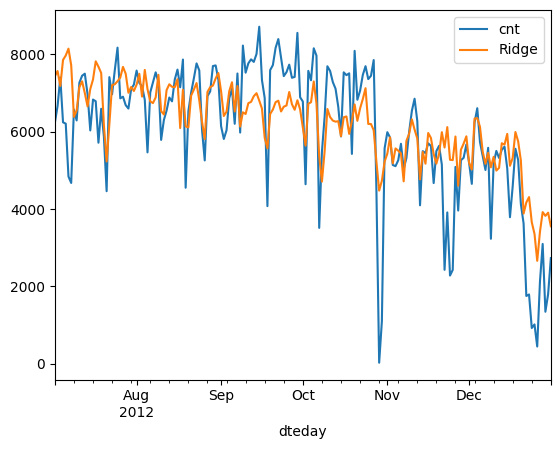

In [44]:
results=pd.DataFrame(y_test.copy())
results['Ridge']=y_predict
results.plot()

In [45]:
print("SVM Model")
model = make_pipeline(preprocessing.StandardScaler(),SVR(kernel='rbf', C=100))
y_predict=make_model(model, X_train, y_train, X_test, y_test)

SVM Model
MSE:  2922597.2248738282


<AxesSubplot: xlabel='dteday'>

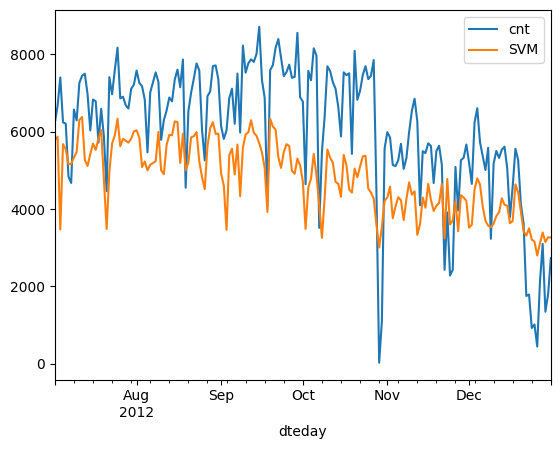

In [46]:
results=pd.DataFrame(y_test.copy())
results['SVM']=y_predict
results.plot()

In [49]:
print("BaggingRegressor")
y_predict=make_model(BaggingRegressor(n_estimators=50, max_samples=20,max_features=9), X_train, y_train, X_test, y_test)

BaggingRegressor
MSE:  2616278.6562273228


<AxesSubplot: xlabel='dteday'>

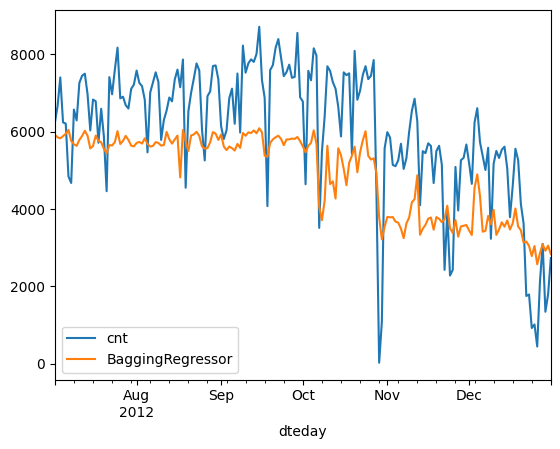

In [50]:
results=pd.DataFrame(y_test.copy())
results['BaggingRegressor']=y_predict
results.plot()

In [53]:
lag_y=pd.DataFrame({'y0':dY.iloc[:,-1]})
for i in range(1,21):
    lag_y[f"y-{i}"]=dY.iloc[:,-1].shift(i)
lag_y

,y0,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,...,y-11,y-12,y-13,y-14,y-15,y-16,y-17,y-18,y-19,y-20
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,801,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,1349,801.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,1562,1349.0,801.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,1600,1562.0,1349.0,801.0,985.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,5557.0,...,3786.0,5047.0,5611.0,5532.0,5319.0,5501.0,5170.0,3228.0,5582.0,5008.0
2012-12-28,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,...,4585.0,3786.0,5047.0,5611.0,5532.0,5319.0,5501.0,5170.0,3228.0,5582.0
2012-12-29,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,...,5557.0,4585.0,3786.0,5047.0,5611.0,5532.0,5319.0,5501.0,5170.0,3228.0


In [91]:
new_df=pd.concat([lag_y,df],axis=1)
new_df=new_df.dropna()
new_df=new_df.drop(columns=['y0'],axis=1)

In [92]:
new_df

,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,y-10,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-21,1927.0,1650.0,683.0,1000.0,1204.0,1248.0,1421.0,1406.0,1162.0,1263.0,...,5,1,1,0.177500,0.157833,0.457083,0.353242,75,1468,1543
2011-01-22,1543.0,1927.0,1650.0,683.0,1000.0,1204.0,1248.0,1421.0,1406.0,1162.0,...,6,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981
2011-01-23,981.0,1543.0,1927.0,1650.0,683.0,1000.0,1204.0,1248.0,1421.0,1406.0,...,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986
2011-01-24,986.0,981.0,1543.0,1927.0,1650.0,683.0,1000.0,1204.0,1248.0,1421.0,...,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
2011-01-25,1416.0,986.0,981.0,1543.0,1927.0,1650.0,683.0,1000.0,1204.0,1248.0,...,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,5557.0,4585.0,...,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,5557.0,...,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,...,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [93]:
dY=new_df.iloc[:,-3:]
dX=new_df.iloc[:,1:-3]

In [94]:
y_train=dY.iloc[:last_train_index, -1]
y_test=dY.iloc[last_train_index:,-1]

In [95]:
X_train=dX.iloc[:last_train_index]
X_test=dX.iloc[last_train_index:]

Ridge Model
MSE:  1091944.4842782503


<AxesSubplot: xlabel='dteday'>

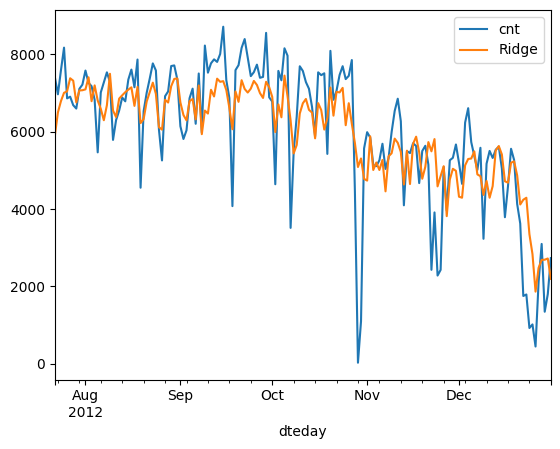

In [96]:
print("Ridge Model")
y_predict=make_model(Ridge(alpha= 1, solver= 'auto'), X_train, y_train, X_test, y_test)
results=pd.DataFrame(y_test.copy())
results['Ridge']=y_predict
results.plot()

SVM Model
MSE:  2464232.0000988


<AxesSubplot: xlabel='dteday'>

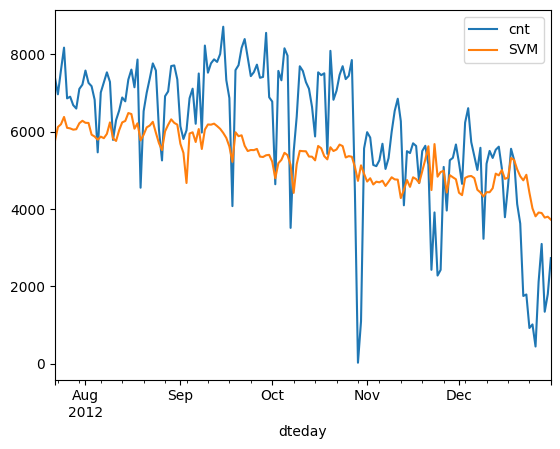

In [97]:
print("SVM Model")
model = make_pipeline(preprocessing.StandardScaler(),SVR(kernel='rbf', C=100))
y_predict=make_model(model, X_train, y_train, X_test, y_test)
results=pd.DataFrame(y_test.copy())
results['SVM']=y_predict
results.plot()

BaggingRegressor
MSE:  2125715.87844908


<AxesSubplot: xlabel='dteday'>

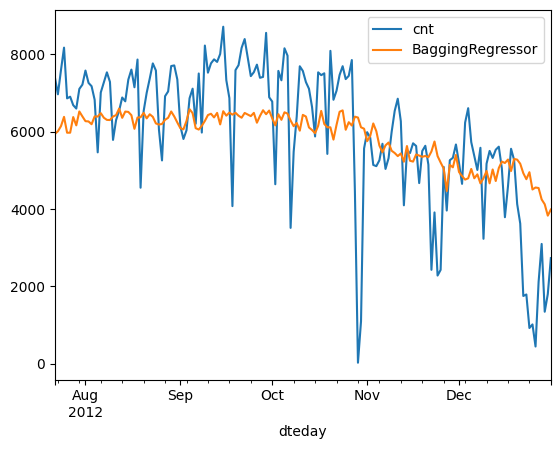

In [98]:
print("BaggingRegressor")
y_predict=make_model(BaggingRegressor(n_estimators=50, max_samples=20,max_features=9), X_train, y_train, X_test, y_test)
results=pd.DataFrame(y_test.copy())
results['BaggingRegressor']=y_predict
results.plot()

In [65]:
df_day=df_day.drop(columns=['atemp'],axis=1)

In [9]:
df_day['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [10]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 62.9+ KB


<AxesSubplot: xlabel='dteday', ylabel='cnt'>

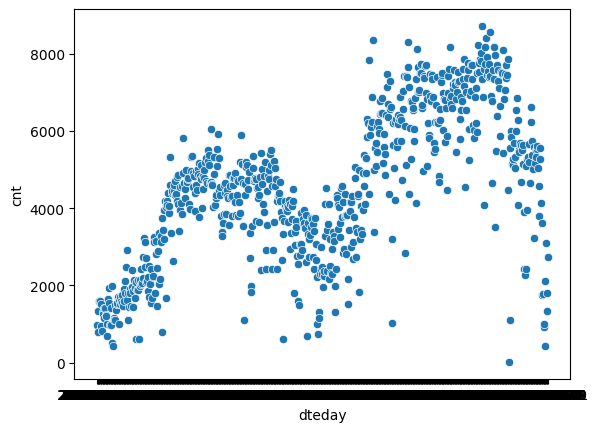

In [11]:
sns.scatterplot(data=df_day, x= df_day['dteday'], y=df_day['cnt'])

<AxesSubplot: xlabel='season', ylabel='cnt'>

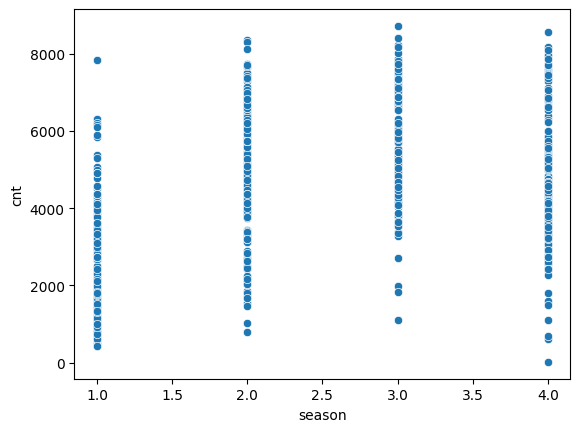

In [12]:
sns.scatterplot(data=df_day, x= df_day['season'], y=df_day['cnt'])

<AxesSubplot: xlabel='mnth', ylabel='cnt'>

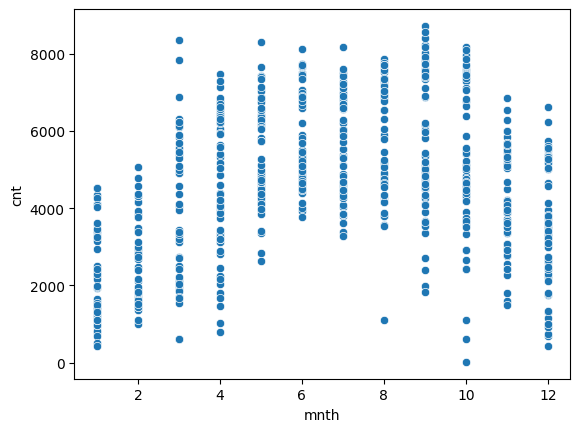

In [13]:
sns.scatterplot(data=df_day, x= df_day['mnth'], y=df_day['cnt'])

In [14]:
df_day=df_day.drop(columns=['dteday'],axis=1)

In [15]:
df_day

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [16]:
for col in ['temp', 'temp', 'windspeed']:
    q_low = df_day[col].quantile(0.01)
    q_hi  = df_day[col].quantile(0.99)

    df_filtered = df_day[(df_day[col] < q_hi) & (df_day[col] > q_low)]

col='cnt'
q_low = df_day[col].quantile(0.04)
q_hi  = df_day[col].quantile(0.96)
df_filtered = df_day[(df_day[col] < q_hi) & (df_day[col] > q_low)]
    
df_filtered.shape

(671, 10)

In [18]:
df_day=df_filtered

In [19]:
df_day.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,2.515648,6.514158,0.026826,2.940387,0.703428,1.383010,0.500046,0.626048,0.189779,4512.515648
std,1.100601,3.410173,0.161694,1.977340,0.457087,0.524854,0.181899,0.140049,0.076615,1716.202411
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.097391,0.187917,0.022392,1167.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.342500,0.517464,0.134954,3316.000000
50%,3.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.623750,0.180975,4548.000000
75%,3.000000,9.500000,0.000000,5.000000,1.000000,2.000000,0.660416,0.729583,0.231356,5741.500000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,7641.000000


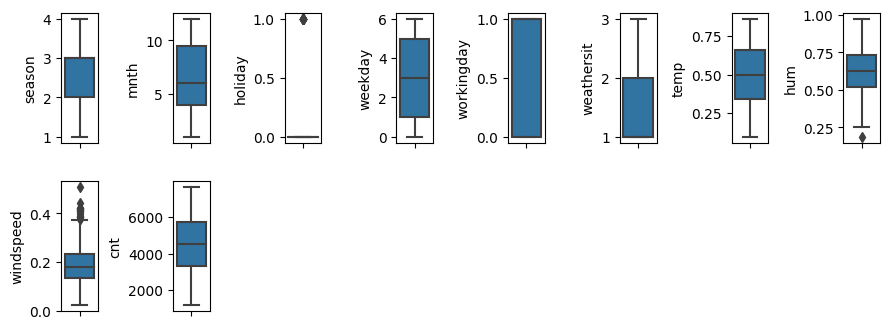

In [20]:
plt.figure(figsize=(9,5 ))
no=0
for col in df_day.columns:
    no+=1
    plt.subplot(3,8,no)
    plt.tight_layout()
    sns.boxplot(y=df_day[col]) 

<AxesSubplot: xlabel='windspeed', ylabel='Count'>

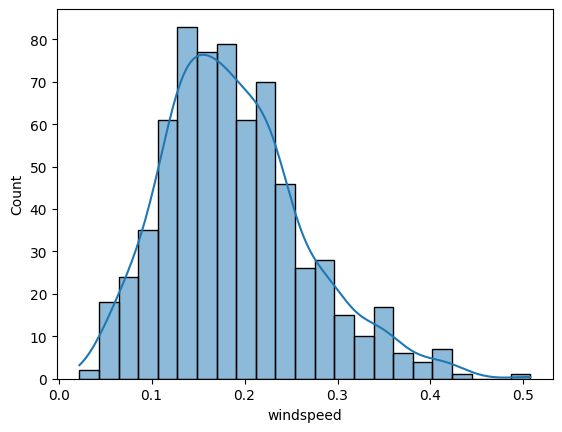

In [21]:
sns.histplot(df_day["windspeed"], kde=True)

<AxesSubplot: xlabel='hum', ylabel='Count'>

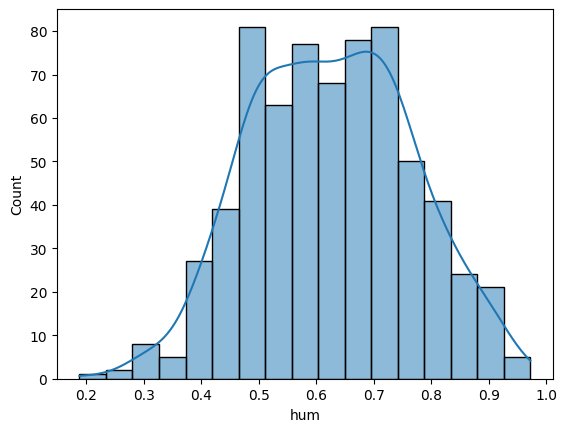

In [22]:
sns.histplot(df_day["hum"], kde=True)

In [23]:
for x in ['windspeed']:
    q75,q25 = np.percentile(df_day.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_day.loc[df_day[x] < min,x] = np.nan
    df_day.loc[df_day[x] > max,x] = np.nan

In [24]:
df_day.isnull().sum()

season         0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
hum            0
windspeed     15
cnt            0
dtype: int64

In [25]:
df_day = df_day.dropna(axis = 0)

In [27]:
for x in ['hum']:
    q75,q25 = np.percentile(df_day.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_day.loc[df_day[x] < min,x] = np.nan
    df_day.loc[df_day[x] > max,x] = np.nan

In [28]:
df_day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [35]:
# df_day=pd.get_dummies(data=df_day,columns=['mnth','weekday','weathersit'])

In [154]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

## Ridge

In [132]:
parameters = {'solver':('auto', 'svd', 'cholesky', 'lsqr'), 'alpha':[1, 10, 100]}
grid_search(parameters, Ridge(), 3, X_train, y_train)

{'alpha': 1, 'solver': 'auto'}


In [134]:
print("Ridge Model")
make_model(Ridge(alpha= 1, solver= 'auto'), X_train, y_train, X_test, y_test)

Ridge Model
MSE:  0.0005884995914655505


## Linear Regression

In [168]:
print("Linear Regression Model")
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
make_model(model, X_train, y_train, X_test, y_test)

Linear Regression Model
MSE:  1.7078975661678662e-30


## SVM

In [151]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 10, 100]}
grid_search(parameters, SVR(), 3, X_train, y_train)

{'C': 100, 'kernel': 'rbf'}


In [165]:
print("SVM Model")
model = make_pipeline(preprocessing.StandardScaler(),SVR(kernel='rbf', C=100))
make_model(model, X_train, y_train, X_test, y_test)

SVM Model
MSE:  0.009904564530342398


## Bagging Regressor

In [152]:
parameters = {'n_estimators':[1, 10, 50], 'max_samples':[1, 10, 20], 'max_features':[1,5,9]}
grid_search(parameters, BaggingRegressor(), 3, X_train, y_train)

{'max_features': 5, 'max_samples': 20, 'n_estimators': 50}


In [153]:
print("BaggingRegressor")
make_model(BaggingRegressor(n_estimators=50, max_samples=20,max_features=9), X_train, y_train, X_test, y_test)

BaggingRegressor
MSE:  0.014196051889452907


## Others

In [103]:
# print("Lasso Model")
# make_model(Lasso(), X_train, y_train, X_test, y_test)

In [104]:
# print("DT Model")
# make_model(tree.DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

In [107]:
# print("RandomForestRegressor")
# make_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)

In [106]:
# print("GradientBoostingRegressor")
# make_model(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

In [ ]:
# print("StackingRegressor")
# make_model(StackingRegressor(estimators=[('lr', RidgeCV()), ('svr', LinearSVR(random_state=42))]), X_train, y_train, X_test, y_test)

In [105]:
# print("AdaBoostRegressor")
# make_model(AdaBoostRegressor(), X_train, y_train, X_test, y_test)